In [1]:
!sudo apt-get install -y fonts-nanum
!sudo fc-cache -fv
!rm ~/.cache/matplotlib -rf
import matplotlib.pyplot as plt
plt.rc('font', family='NanumBarunGothic')
plt.rcParams['axes.unicode_minus'] =False

Reading package lists... Done
Building dependency tree... Done
Reading state information... Done
fonts-nanum is already the newest version (20200506-1).
0 upgraded, 0 newly installed, 0 to remove and 49 not upgraded.
/usr/share/fonts: caching, new cache contents: 0 fonts, 1 dirs
/usr/share/fonts/truetype: caching, new cache contents: 0 fonts, 3 dirs
/usr/share/fonts/truetype/humor-sans: caching, new cache contents: 1 fonts, 0 dirs
/usr/share/fonts/truetype/liberation: caching, new cache contents: 16 fonts, 0 dirs
/usr/share/fonts/truetype/nanum: caching, new cache contents: 12 fonts, 0 dirs
/usr/local/share/fonts: caching, new cache contents: 0 fonts, 0 dirs
/root/.local/share/fonts: skipping, no such directory
/root/.fonts: skipping, no such directory
/usr/share/fonts/truetype: skipping, looped directory detected
/usr/share/fonts/truetype/humor-sans: skipping, looped directory detected
/usr/share/fonts/truetype/liberation: skipping, looped directory detected
/usr/share/fonts/truetype/

In [2]:
import pandas as pd
import folium
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import glob
import chardet

import json
from sklearn.cluster import KMeans
from scipy.spatial import distance

https://kosis.kr/statHtml/statHtml.do?orgId=113&tblId=DT_113_STBL_1029757&vw_cd=MT_ZTITLE&list_id=113_11318_005&seqNo=&lang_mode=ko&language=kor&obj_var_id=&itm_id=&conn_path=MT_ZTITLE

# 인코딩 알아내기

In [3]:
import chardet

file_path = ''

with open(file_path, 'rb') as f:
    result = chardet.detect(f.read(10000)) 
    encoding = result['encoding']

print(f"Detected encoding: {encoding}")

# 도서관 위치 및 대구광역시 행정구역

In [4]:

def detect_encoding(file_path):
    with open(file_path, 'rb') as f:
        result = chardet.detect(f.read())
    return result['encoding']

def read_csv(file_path):
    encoding = detect_encoding(file_path)
    print(f"감지된 인코딩: {encoding}")
    df = pd.read_csv(file_path, encoding=encoding)
    return df

# CSV 파일이 저장된 디렉토리의 경로를 지정합니다.
file_paths = glob.glob('') 

all_data = pd.DataFrame()



for file in file_paths:
    try:
        df = read_csv(file)
        all_data = pd.concat([all_data, df], ignore_index=True)
    except Exception as e:
        print(f"파일 {file} 읽기 실패: {e}")


감지된 인코딩: UTF-8-SIG
감지된 인코딩: UTF-8-SIG
감지된 인코딩: EUC-KR
감지된 인코딩: EUC-KR
감지된 인코딩: EUC-KR
감지된 인코딩: EUC-KR
감지된 인코딩: EUC-KR
감지된 인코딩: EUC-KR


In [5]:
print(all_data.columns)


Index(['도서관명', '시도명', '시군구명', '도서관유형', '휴관일', '평일운영시작시각', '평일운영종료시각',
       '토요일운영시작시각', '토요일운영종료시각', '공휴일운영시작시각', '공휴일운영종료시각', '열람좌석수', '자료수(도서)',
       '자료수(연속간행물)', '자료수(비도서)', '대출가능권수', '대출가능일수', '소재지도로명주소', '운영기관명',
       '도서관전화번호', '부지면적', '건물면적', '홈페이지주소', '위도', '경도', '데이터기준일자'],
      dtype='object')


In [6]:
# import folium
# import json
# import pandas as pd
# import numpy as np
# from sklearn.cluster import KMeans
# from geopy.distance import great_circle

# # 예시 데이터 로딩 (실제 데이터로 교체)
# # all_data = pd.read_csv('your_data.csv')

# # Folium 지도 생성
# m = folium.Map(location=[35.8722, 128.6025], zoom_start=12)

# # 구별 색상 설정
# colors = {
#     '중구': 'blue',
#     '서구': 'green',
#     '동구': 'red',
#     '남구': 'purple',
#     '북구': 'orange',
#     '수성구': 'darkred',
#     '달서구': 'cadetblue',
#     '달성군': 'darkgreen'
# }

# # GeoJSON 파일 로드
# geojson_file = '/content/drive/MyDrive/3학년/대회/데이콘 대회/hangjeongdong_대구광역시.geojson'
# with open(geojson_file, 'r', encoding='utf-8') as f:
#     geojson_data = json.load(f)

# # 지도에 구역별 GeoJSON 추가
# folium.GeoJson(
#     geojson_data,
#     style_function=lambda feature: {
#         'fillColor': colors.get(feature['properties'].get('sggnm', ''), 'gray'),
#         'color': 'black',
#         'weight': 1,
#         'fillOpacity': 0.5
#     }
# ).add_to(m)

# def add_markers(data, m):
#     locations = data[['위도', '경도']].values

#     for idx, row in data.iterrows():
#         color = colors.get(row['시군구명'], 'gray')
#         folium.CircleMarker(
#             location=[row['위도'], row['경도']],
#             radius=3,
#             popup=row['도서관명'],
#             tooltip=row['도서관명'],
#             color='#ffffff',
#             fill=True,
#             fill_color=color,
#             fill_opacity=0.7
#         ).add_to(m)

# add_markers(all_data, m)

# def generate_random_locations(bounds, num_locations):
#     lat_min, lat_max, lon_min, lon_max = bounds
#     return np.array([
#         [
#             np.random.uniform(lat_min, lat_max),
#             np.random.uniform(lon_min, lon_max)
#         ]
#         for _ in range(num_locations)
#     ])

# def recommend_locations(data, num_recommendations=6, min_distance=300):
#     locations = data[['위도', '경도']].values
#     bounds = [
#         35.8,  # 대구의 최소 위도
#         35.9,  # 대구의 최대 위도
#         128.5,  # 대구의 최소 경도
#         128.7   # 대구의 최대 경도
#     ]

#     random_locations = generate_random_locations(bounds, 20000)  # 후보 위치 20000개 생성
#     existing_locations = locations.tolist()

#     # 후보 위치 필터링
#     def is_too_close(center, existing_locations, min_distance):
#         return any(great_circle(center, loc).meters < min_distance for loc in existing_locations)

#     def is_within_bounds(loc, bounds):
#         lat_min, lat_max, lon_min, lon_max = bounds
#         return lat_min <= loc[0] <= lat_max and lon_min <= loc[1] <= lon_max

#     filtered_locations = [loc for loc in random_locations if is_within_bounds(loc, bounds) and not is_too_close(loc, existing_locations, min_distance)]

#     # 무작위로 필터링된 위치 중에서 원하는 개수만큼 선택
#     if len(filtered_locations) < num_recommendations:
#         return filtered_locations
#     return filtered_locations[:num_recommendations]

# def add_recommended_locations(m, locations):
#     for loc in locations:
#         folium.Marker(
#             location=[loc[0], loc[1]],
#             popup='추천 도서관 위치',
#             icon=folium.Icon(color='red', icon='info-sign')
#         ).add_to(m)

# # 새로운 도서관 위치 추천
# recommended_locations = recommend_locations(all_data, num_recommendations=4, min_distance=300)
# add_recommended_locations(m, recommended_locations)

# # 결과 출력
# m


In [7]:
# import folium
# import json
# import pandas as pd
# import numpy as np
# from geopy.distance import great_circle
# from sklearn.cluster import KMeans
# from shapely.geometry import shape, Point
# import random

# # Load GeoJSON data
# geojson_file = '/content/drive/MyDrive/3학년/대회/데이콘 대회/hangjeongdong_대구광역시.geojson'
# with open(geojson_file, 'r', encoding='utf-8') as f:
#     geojson_data = json.load(f)

# # Load existing libraries data
# # all_data = pd.read_csv('your_data.csv') # Load your actual data

# def generate_candidate_locations(geojson_data, num_points=100):
#     candidate_locations = []
#     for feature in geojson_data['features']:
#         polygon = shape(feature['geometry'])
#         minx, miny, maxx, maxy = polygon.bounds
#         for _ in range(num_points):
#             while True:
#                 point = Point(random.uniform(minx, maxx), random.uniform(miny, maxy))
#                 if polygon.contains(point):
#                     candidate_locations.append((point.y, point.x, feature['properties']['sggnm']))
#                     break
#     return pd.DataFrame(candidate_locations, columns=['위도', '경도', '행정구역'])

# def filter_candidates(candidates, existing_libraries, min_distance=500):
#     filtered_candidates = []
#     for idx, candidate in candidates.iterrows():
#         too_close = False
#         for _, library in existing_libraries.iterrows():
#             if great_circle((candidate['위도'], candidate['경도']), (library['위도'], library['경도'])).meters < min_distance:
#                 too_close = True
#                 break
#         if not too_close:
#             filtered_candidates.append(candidate)
#     return pd.DataFrame(filtered_candidates)

# def recommend_locations(filtered_candidates, num_locations=2):
#     districts = filtered_candidates['행정구역'].unique()
#     recommendations = []

#     for district in districts:
#         district_candidates = filtered_candidates[filtered_candidates['행정구역'] == district]
#         if len(district_candidates) < num_locations:
#             continue

#         kmeans = KMeans(n_clusters=num_locations).fit(district_candidates[['위도', '경도']])
#         centers = kmeans.cluster_centers_

#         # Find closest candidate points to the cluster centers
#         for center in centers:
#             distances = district_candidates.apply(lambda row: great_circle((row['위도'], row['경도']), center).meters, axis=1)
#             nearest_idx = distances.idxmin()
#             recommendations.append(district_candidates.loc[nearest_idx])

#     return pd.DataFrame(recommendations)

# # Example usage
# candidate_locations = generate_candidate_locations(geojson_data, num_points=500)
# filtered_candidates = filter_candidates(candidate_locations, all_data, min_distance=500)
# recommended_locations = recommend_locations(filtered_candidates, num_locations=2)

# # Add recommended locations to the map
# def add_recommendations(data, m):
#     for idx, row in data.iterrows():
#         folium.Marker(
#             location=[row['위도'], row['경도']],
#             popup=f"추천 도서관 ({row['행정구역']})",
#             icon=folium.Icon(color='red', icon='info-sign')
#         ).add_to(m)

# add_recommendations(all_data, m)
# m


In [8]:
print("중구 도서관 개수 :",len(all_data[all_data['시군구명'] == '중구']))
print("북구 도서관 개수 :",len(all_data[all_data['시군구명'] == '동구']))
print("남구 도서관 개수 :",len(all_data[all_data['시군구명'] == '서구']))
print("동구 도서관 개수 :",len(all_data[all_data['시군구명'] == '남구']))
print("서구 도서관 개수 :",len(all_data[all_data['시군구명'] == '북구']))
print("달성군 도서관 개수 :",len(all_data[all_data['시군구명'] == '달성군']))
print("달서구 도서관 개수 :",len(all_data[all_data['시군구명'] == '달서구']))
print("수성구 도서관 개수 :",len(all_data[all_data['시군구명'] == '수성구']))

중구 도서관 개수 : 27
북구 도서관 개수 : 14
남구 도서관 개수 : 20
동구 도서관 개수 : 3
서구 도서관 개수 : 53
달성군 도서관 개수 : 46
달서구 도서관 개수 : 51
수성구 도서관 개수 : 9


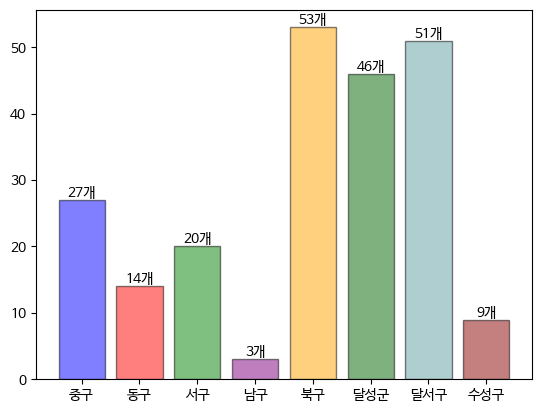

In [9]:
import matplotlib.pyplot as plt

도서관개수 = [
    len(all_data[all_data['시군구명'] == '중구']),
    len(all_data[all_data['시군구명'] == '동구']),
    len(all_data[all_data['시군구명'] == '서구']),
    len(all_data[all_data['시군구명'] == '남구']),
    len(all_data[all_data['시군구명'] == '북구']),
    len(all_data[all_data['시군구명'] == '달성군']),
    len(all_data[all_data['시군구명'] == '달서구']),
    len(all_data[all_data['시군구명'] == '수성구'])
]

행정구역 = ['중구', '동구', '서구', '남구', '북구', '달성군', '달서구', '수성구']

plt.bar(행정구역, 도서관개수, color=['blue','red','green','purple','orange','darkgreen','cadetblue','darkred'], alpha=0.5,edgecolor = 'black')



for i in range(len(행정구역)):
    plt.text(i, 도서관개수[i] + 0.5, str(도서관개수[i])+"개", ha='center')

plt.show()


In [10]:
all_data['시군구명'].unique()

array(['북구', '남구', '달성군', '동구', '달서구', '수성구', '서구', '중구'], dtype=object)

# 종이책 선호 그래프

In [11]:
data = pd.read_csv('',encoding='EUC-KR')
data

,통계분류(1),통계분류(2),2013,2013.1,2013.2,2015,2015.1,2015.2,2017,2017.1,2017.2,2019,2019.1,2019.2,2021,2021.1,2021.2
0,통계분류(1),통계분류(2),사례수,읽음,안읽음,사례수,읽음,안읽음,사례수,읽음,안읽음,사례수,읽음,안읽음,사례수,읽음,안읽음
1,전체,소계,3000,96,4,3000,94.9,5.1,3329,91.7,8.3,3126,90.7,9.3,3320,87.4,12.6
2,학교급,초등학교,1000,99.4,0.6,845,99.4,0.6,945,96.8,3.2,1005,94.8,5.2,1117,93.2,6.8
3,학교급,중학교,1000,96,4,1041,95,5,1085,92.5,7.5,985,91.6,8.4,1095,87,13
4,학교급,고등학교,1000,92.7,7.3,1115,91.3,8.7,1298,87.2,12.8,1136,86.3,13.7,1108,82.1,17.9
5,학교급 성별,초등학교-남,517,99.2,0.8,440,99.2,0.8,489,96,4,518,92.2,7.8,575,93.7,6.3
6,학교급 성별,초등학교-여,483,99.6,0.4,404,99.6,0.4,456,97.8,2.2,487,97.5,2.5,541,92.7,7.3
7,학교급 성별,중학교-남,496,95,5,544,94.5,5.5,567,91.7,8.3,512,88.1,11.9,566,84,16
8,학교급 성별,중학교-여,504,97,3,496,95.4,4.6,519,93.4,6.6,473,95.4,4.6,529,90.2,9.8
9,학교급 성별,고등학교-남,495,90.7,9.3,582,90.3,9.7,690,84.6,15.4,594,80.7,19.3,579,77.2,22.8


In [12]:
subset_data = data.iloc[:5]
subset_data

,통계분류(1),통계분류(2),2013,2013.1,2013.2,2015,2015.1,2015.2,2017,2017.1,2017.2,2019,2019.1,2019.2,2021,2021.1,2021.2
0,통계분류(1),통계분류(2),사례수,읽음,안읽음,사례수,읽음,안읽음,사례수,읽음,안읽음,사례수,읽음,안읽음,사례수,읽음,안읽음
1,전체,소계,3000,96,4,3000,94.9,5.1,3329,91.7,8.3,3126,90.7,9.3,3320,87.4,12.6
2,학교급,초등학교,1000,99.4,0.6,845,99.4,0.6,945,96.8,3.2,1005,94.8,5.2,1117,93.2,6.8
3,학교급,중학교,1000,96,4,1041,95,5,1085,92.5,7.5,985,91.6,8.4,1095,87,13
4,학교급,고등학교,1000,92.7,7.3,1115,91.3,8.7,1298,87.2,12.8,1136,86.3,13.7,1108,82.1,17.9


In [13]:
subset_data.rename(columns={
    '2013.1' : '2013_읽음',
    '2013.2' : '2013_안읽음',

    '2015.1' : '2015_읽음',
    '2015.2' : '2015_안읽음',

    '2017.1' : '2017_읽음',
    '2017.2' : '2017_안읽음',

    '2019.1' : '2019_읽음',
    '2019.2' : '2019_안읽음',

    '2021.1' : '2021_읽음',
    '2021.2' : '2021_안읽음'
}, inplace=True)

<ipython-input-13-8b54d6e35bf9>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  subset_data.rename(columns={


In [14]:

날짜 = [2013,2015,2017,2019,2021]


전체독서읽음비율 = [subset_data['2013_읽음'][1],subset_data['2015_읽음'][1],subset_data['2017_읽음'][1],subset_data['2019_읽음'][1],subset_data['2021_읽음'][1]]
초등학교독서읽음비율 = [subset_data['2013_읽음'][2],subset_data['2015_읽음'][2],subset_data['2017_읽음'][2],subset_data['2019_읽음'][2],subset_data['2021_읽음'][2]]
중학교독서읽음비율 = [subset_data['2013_읽음'][3],subset_data['2015_읽음'][3],subset_data['2017_읽음'][3],subset_data['2019_읽음'][3],subset_data['2021_읽음'][3]]
고등학교독서읽음비율 = [subset_data['2013_읽음'][4],subset_data['2015_읽음'][4],subset_data['2017_읽음'][4],subset_data['2019_읽음'][4],subset_data['2021_읽음'][4]]


전체독서읽음비율 = list(map(float, 전체독서읽음비율))
초등학교독서읽음비율 = list(map(float, 초등학교독서읽음비율))
중학교독서읽음비율 = list(map(float, 중학교독서읽음비율))
고등학교독서읽음비율 = list(map(float, 고등학교독서읽음비율))


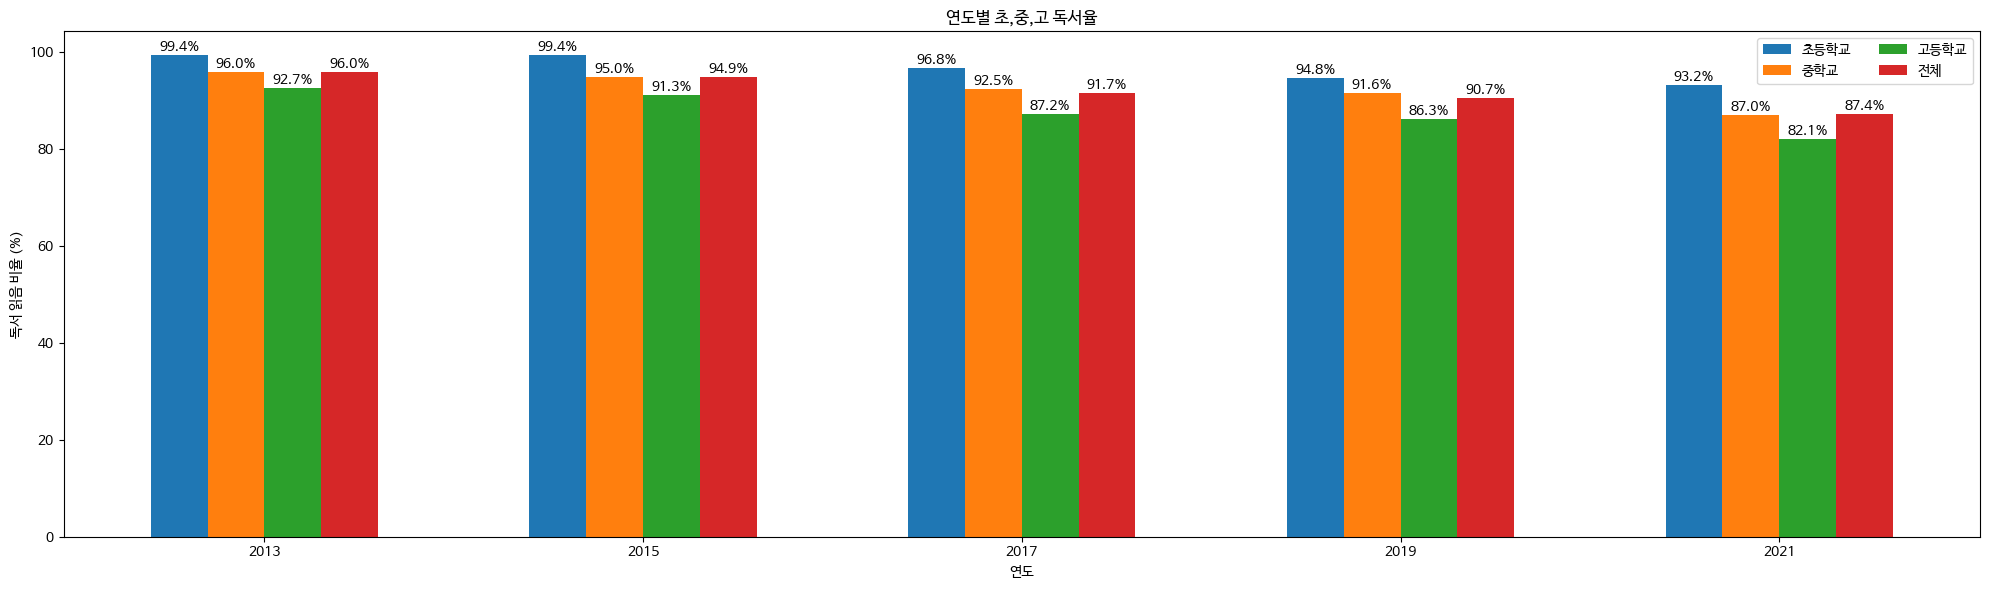

In [15]:
x = np.arange(len(날짜))
width = 0.15

fig, ax = plt.subplots(figsize=(20, 6))

bars1 = ax.bar(x - 1.5*width, 초등학교독서읽음비율, width, label='초등학교')
bars2 = ax.bar(x - 0.5*width, 중학교독서읽음비율, width, label='중학교')
bars3 = ax.bar(x + 0.5*width, 고등학교독서읽음비율, width, label='고등학교')
bars4 = ax.bar(x + 1.5*width, 전체독서읽음비율, width, label='전체')

for bars in [bars1, bars2, bars3, bars4]:
    for bar in bars:
        height = bar.get_height()
        ax.text(
            bar.get_x() + bar.get_width() / 2,
            height,
            f'{height:.1f}%',
            ha='center',
            va='bottom'
        )

ax.set_xlabel('연도')
ax.set_ylabel('독서 읽음 비율 (%)')
ax.set_title('연도별 초,중,고 독서율')
ax.set_xticks(x)
ax.set_xticklabels(날짜)
ax.legend(ncol=2)
plt.tight_layout()
plt.show()

회귀 계수: -1.0699999999999996, 절편: 2250.329999999999
     연도  예측 읽음 비율
0  2023     85.72
1  2025     83.58
2  2027     81.44
3  2029     79.30


/usr/local/lib/python3.10/dist-packages/sklearn/base.py:493: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  warnings.warn(


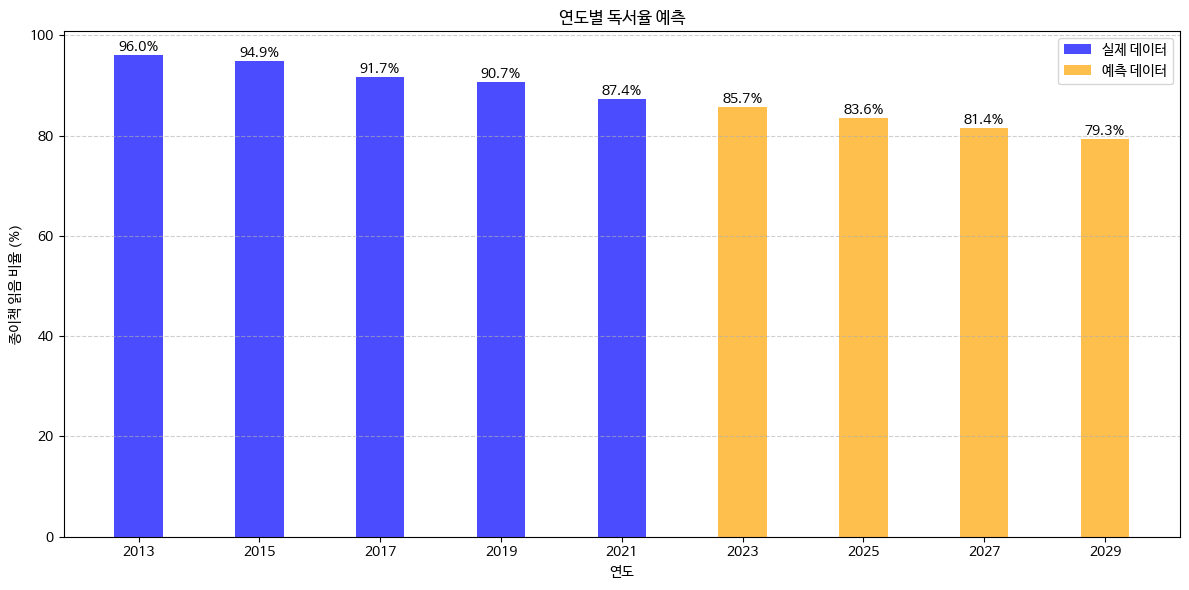

In [16]:
# 필요한 라이브러리 임포트
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

# 데이터 준비 (예시 데이터 입력)
data = {
    '연도': [2013, 2015, 2017, 2019, 2021],  # 2021은 실제 값 없음
    '사례수': [3000, 3000, 3329, 3126, 3320],
    '읽음': [96, 94.9, 91.7, 90.7, 87.4],  # 종이책을 읽은 비율
    '안읽음': [4, 5.1, 8.3, 9.3, 12.6]    # 종이책을 안 읽은 비율
}

# 데이터프레임 생성
df = pd.DataFrame(data)

X = df[['연도']]
y = df['읽음']

model = LinearRegression()
model.fit(X, y)

print(f'회귀 계수: {model.coef_[0]}, 절편: {model.intercept_}')

future_years = np.array([2023, 2025, 2027, 2029]).reshape(-1, 1)
predictions = model.predict(future_years)

predictions_df = pd.DataFrame({'연도': future_years.flatten(), '예측 읽음 비율': predictions})
print(predictions_df)

all_data = pd.concat([df[['연도', '읽음']], predictions_df.rename(columns={'예측 읽음 비율': '읽음'})])

plt.figure(figsize=(12, 6))

# 실제 데이터 막대
bars_actual = plt.bar(df['연도'], df['읽음'], color='blue', alpha=0.7, label='실제 데이터')

# 예측 데이터 막대
bars_predicted = plt.bar(predictions_df['연도'], predictions_df['예측 읽음 비율'], color='orange', alpha=0.7, label='예측 데이터')

for bar in bars_actual:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

for bar in bars_predicted:
    height = bar.get_height()
    plt.text(
        bar.get_x() + bar.get_width() / 2,
        height,
        f'{height:.1f}%',
        ha='center',
        va='bottom'
    )

plt.title('연도별 독서율 예측')
plt.xlabel('연도')
plt.ylabel('종이책 읽음 비율 (%)')
plt.xticks(list(df['연도']) + list(predictions_df['연도']))
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()


# 독서를 안하는 이유는?

In [17]:
독서를안하는이유 = pd.read_csv('',encoding='EUC-KR')
독서를안하는이유

,통계분류(1),통계분류(2),통계분류(3),2013,2013.1,2013.2,2013.3,2013.4,2013.5,2013.6,...,2019.6,2019.7,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7
0,통계분류(1),통계분류(2),통계분류(3),사례수,읽을 만한 책이 없어서,어떤 책을 읽을지 몰라서,책을 읽고 이해하기가 어려워서,컴퓨터(인터넷) 때문에 시간이 없다,학교공부 학원수강 등으로 시간 없음,책 읽기가 싫고 습관이 들지 않았다,...,책 읽기가 싫고 습관이 들지 않았다,TV시청으로 시간 없음,사례수,스마트폰 텔레비전 인터넷 게임 등을 이용해서,교과 공부 때문에 책 읽을 시간이 없어서,책 읽는 습관이 들지 않아서,책 읽기가 싫어서,읽을 만한 책이 없어서,어떤 책을 읽을지 몰라서,책을 읽고 이해하기가 어려워서
1,전체,소계,소계,3000,7.8,9.4,3,14.9,30.1,21.7,...,22,3,3320,23.7,21.2,19.1,16.2,5.8,5.5,2.3
2,학교급별,초등학교,소계,-,-,-,-,-,-,-,...,18.6,4.9,1117,19.9,14.2,19.4,17.4,8.6,8,3.5
3,학교급별,중학교,소계,-,-,-,-,-,-,-,...,22.6,2.2,1095,27.3,21.3,18.8,17,5.2,4.6,1.7
4,학교급별,고등학교,소계,-,-,-,-,-,-,-,...,24.5,2,1108,24,28.2,19.2,14.3,3.7,3.8,1.6
5,학교급별+학년별,초등학교,4학년,327,9.5,15.1,4,6.7,37.7,13.8,...,14.5,5.7,380,15.6,17.2,20.1,12.1,9.2,10.1,4.3
6,학교급별+학년별,초등학교,5학년,319,9.4,10.8,3.6,9.4,35.2,17.6,...,19.4,5.6,360,19.9,13.8,20.2,18.4,8,8.7,3
7,학교급별+학년별,초등학교,6학년,354,10.1,11.4,2.6,12,29.5,21.6,...,22,3.4,376,24.1,11.6,18,21.6,8.4,5.2,3
8,학교급별+학년별,중학교,1학년,338,9.2,8.8,3.1,15.6,30,20.2,...,25.8,1.8,394,28.8,17.1,20.3,18.1,4.6,5.5,1.6
9,학교급별+학년별,중학교,2학년,329,7.7,8.7,2.1,18.3,25.1,25.2,...,20.9,2.2,357,27.1,26.8,16.6,14.4,5.8,3.8,1.5


In [18]:
ㅇㅇ = 독서를안하는이유.iloc[0].reset_index()

list(ㅇㅇ[0])



['통계분류(1)',
 '통계분류(2)',
 '통계분류(3)',
 '사례수',
 '읽을 만한 책이 없어서',
 '어떤 책을 읽을지 몰라서 ',
 '책을 읽고 이해하기가 어려워서',
 '컴퓨터(인터넷) 때문에 시간이 없다',
 '학교공부 학원수강 등으로 시간 없음',
 '책 읽기가 싫고 습관이 들지 않았다',
 'TV시청으로 시간 없음',
 '사례수',
 '읽을 만한 책이 없어서',
 '어떤 책을 읽을지 몰라서 ',
 '컴퓨터(인터넷) 때문에 시간이 없다',
 '학교공부 학원수강 등으로 시간 없음',
 '책 읽기가 싫고 습관이 들지 않았다',
 'TV시청으로 시간 없음',
 '사례수',
 '읽을 만한 책이 없어서',
 '어떤 책을 읽을지 몰라서 ',
 '책을 읽고 이해하기가 어려워서',
 '독서의 필요성 느끼지 못한다',
 '컴퓨터(인터넷) 때문에 시간이 없다',
 '학교공부 학원수강 등으로 시간 없음',
 '책 읽기가 싫고 습관이 들지 않았다',
 'TV시청으로 시간 없음',
 '사례수',
 '읽을 만한 책이 없어서',
 '어떤 책을 읽을지 몰라서 ',
 '책을 읽고 이해하기가 어려워서',
 '컴퓨터(인터넷) 때문에 시간이 없다',
 '학교공부 학원수강 등으로 시간 없음',
 '책 읽기가 싫고 습관이 들지 않았다',
 'TV시청으로 시간 없음',
 '사례수',
 '스마트폰 텔레비전 인터넷 게임 등을 이용해서',
 '교과 공부 때문에 책 읽을 시간이 없어서',
 '책 읽는 습관이 들지 않아서',
 '책 읽기가 싫어서',
 '읽을 만한 책이 없어서',
 '어떤 책을 읽을지 몰라서 ',
 '책을 읽고 이해하기가 어려워서']

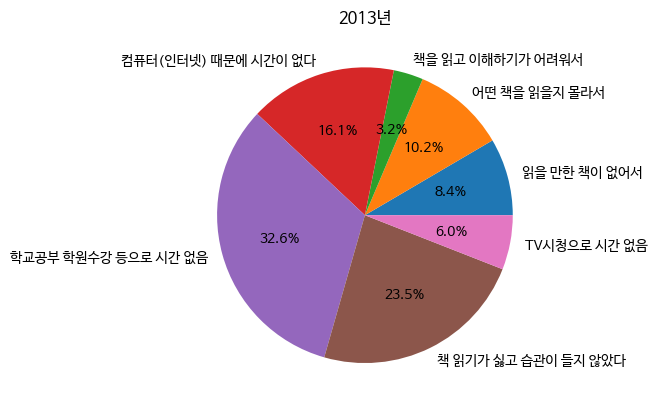

In [19]:
독서를안하는이유_데이터2013 = 독서를안하는이유[['2013.1','2013.2','2013.3','2013.4','2013.5','2013.6','2013.7']].iloc[1]
독서를안하는이유_요인2013 = 독서를안하는이유[['2013.1','2013.2','2013.3','2013.4','2013.5','2013.6','2013.7']].iloc[0]
plt.pie(독서를안하는이유_데이터2013, labels=독서를안하는이유_요인2013,autopct='%.1f%%')
plt.title("2013년")
plt.show()

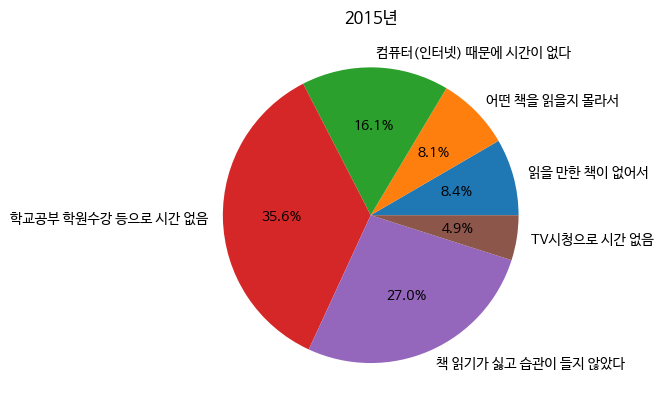

In [20]:
독서를안하는이유_데이터2015 = 독서를안하는이유[['2015.1','2015.2','2015.3','2015.4','2015.5','2015.6']].iloc[1]
독서를안하는이유_요인2015 = 독서를안하는이유[['2015.1','2015.2','2015.3','2015.4','2015.5','2015.6']].iloc[0]
plt.pie(독서를안하는이유_데이터2015, labels=독서를안하는이유_요인2015,autopct='%.1f%%')
plt.title("2015년")
plt.show()

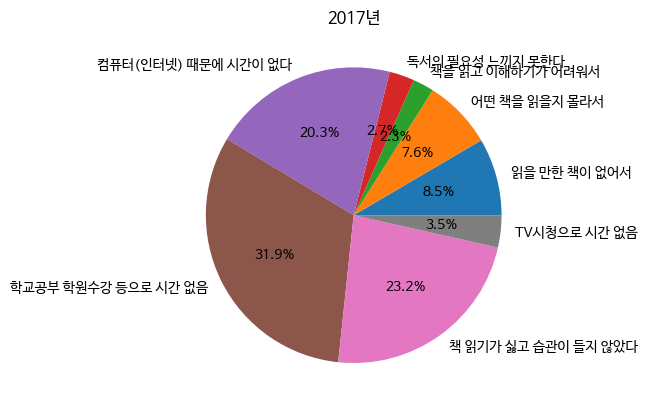

In [21]:
독서를안하는이유_데이터2017 = 독서를안하는이유[['2017.1','2017.2','2017.3','2017.4','2017.5','2017.6','2017.7','2017.8']].iloc[1]
독서를안하는이유_요인2017 = 독서를안하는이유[['2017.1','2017.2','2017.3','2017.4','2017.5','2017.6','2017.7','2017.8']].iloc[0]
plt.pie(독서를안하는이유_데이터2017, labels=독서를안하는이유_요인2017,autopct='%.1f%%')
plt.title("2017년")
plt.show()

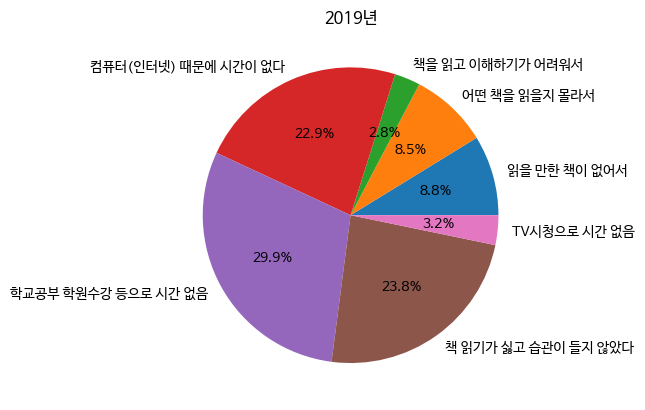

In [22]:
독서를안하는이유_데이터2019 = 독서를안하는이유[['2019.1','2019.2','2019.3','2019.4','2019.5','2019.6','2019.7']].iloc[1]
독서를안하는이유_요인2019 = 독서를안하는이유[['2019.1','2019.2','2019.3','2019.4','2019.5','2019.6','2019.7']].iloc[0]
plt.pie(독서를안하는이유_데이터2019, labels=독서를안하는이유_요인2019,autopct='%.1f%%')
plt.title("2019년")
plt.show()

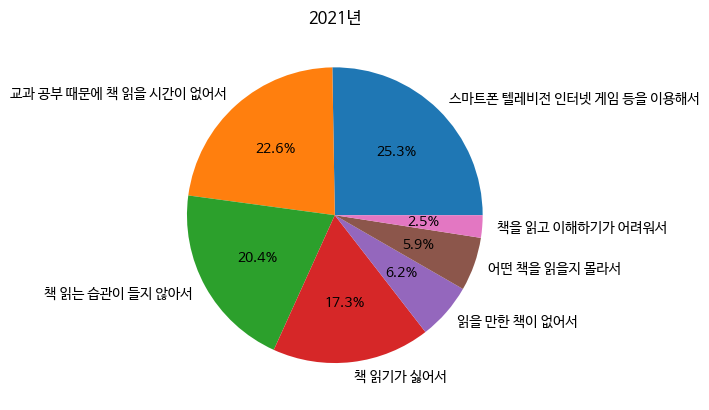

In [23]:
독서를안하는이유_데이터2021 = 독서를안하는이유[['2021.1','2021.2','2021.3','2021.4','2021.5','2021.6','2021.7']].iloc[1]
독서를안하는이유_요인2021 = 독서를안하는이유[['2021.1','2021.2','2021.3','2021.4','2021.5','2021.6','2021.7']].iloc[0]
plt.pie(독서를안하는이유_데이터2021, labels=독서를안하는이유_요인2021,autopct='%.1f%%')
plt.title("2021년")
plt.show()

# 독서를 하는 곳

In [24]:
독서를하는곳 = pd.read_csv('',encoding='EUC-KR')
독서를하는곳

,통계분류(1),통계분류(2),통계분류(3),2010,2010.1,2010.2,2010.3,2010.4,2010.5,2010.6,...,2019.8,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8
0,통계분류(1),통계분류(2),통계분류(3),사례수,집에서,장소를 가리지 않음,학교에서,공공도서관에서,통학시 이동시 차 안에서,기타,...,카페에서,사례수,집에서,교실에서,장소를 가리지 않음,학교도서관,학교밖 도서관에서,밖에서 이동할 때,서점에서,카페에서
1,전체,소계,소계,3000,60.8,13.1,17.6,3.8,0.5,1.2,...,1.7,3036,55.4,18.7,6.2,5.6,4.1,3.9,2.5,2
2,학교급별,초등학교,소계,-,-,-,-,-,-,-,...,1.3,1070,57.5,17.5,6.5,4.6,5.1,2.6,1.9,1.7
3,학교급별,중학교,소계,1000,63.6,13.9,14.5,3.8,0.5,1.5,...,1.3,1006,56.8,17.9,6.3,5.4,3.2,4.6,3,1.9
4,학교급별,고등학교,소계,1000,52,10.8,29.5,2.1,0.8,1.3,...,2.5,960,51.6,21,5.8,6.9,3.9,4.5,2.8,2.4
5,학교급 학년,초등학교 4학년,소계,-,-,-,-,-,-,-,...,1,371,56.9,16.1,7.6,4.7,5.4,3.3,2.7,1.3
6,학교급 학년,초등학교 5학년,소계,-,-,-,-,-,-,-,...,1.1,336,57.3,18.5,4.9,5.5,5.2,2.3,1.5,1.4
7,학교급 학년,초등학교 6학년,소계,-,-,-,-,-,-,-,...,1.8,363,58.2,18,6.9,3.5,4.8,2.3,1.4,2.2
8,학교급 학년,중학교 1학년,소계,-,-,-,-,-,-,-,...,1.3,370,57.4,19.2,6,4,2.6,4.6,3.3,1.8
9,학교급 학년,중학교 2학년,소계,-,-,-,-,-,-,-,...,1.4,331,59.1,15.9,5.8,6.5,3.5,4.3,2.6,1.8


In [25]:
ㅇㅇ = 독서를하는곳.iloc[0].reset_index()

len(list(ㅇㅇ[0]))


63

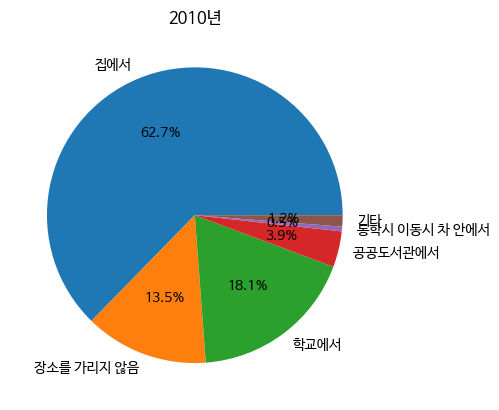

In [26]:
독서장소_데이터2010 = 독서를하는곳[['2010.1','2010.2','2010.3','2010.4','2010.5','2010.6']].iloc[1]
독서장소_요인2010 = 독서를하는곳[['2010.1','2010.2','2010.3','2010.4','2010.5','2010.6']].iloc[0]
plt.title("2010년")
plt.pie(독서장소_데이터2010, labels=독서장소_요인2010,autopct='%.1f%%')
plt.show()

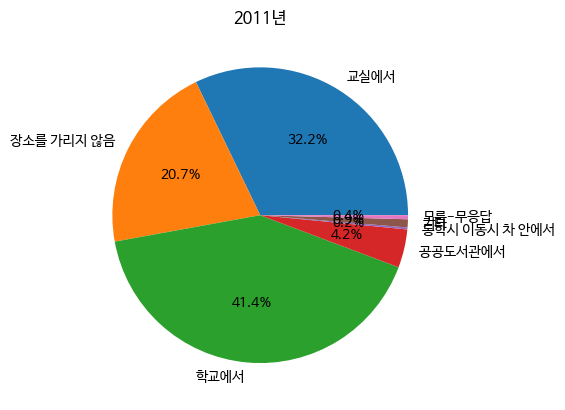

In [27]:
독서장소_데이터2011 = 독서를하는곳[['2011.1','2011.2','2011.3','2011.4','2011.5','2011.6','2011.7']].iloc[1]
독서장소_요인2011 = 독서를하는곳[['2011.1','2011.2','2011.3','2011.4','2011.5','2011.6','2011.7']].iloc[0]
plt.title("2011년")
plt.pie(독서장소_데이터2011, labels=독서장소_요인2011,autopct='%.1f%%')
plt.show()

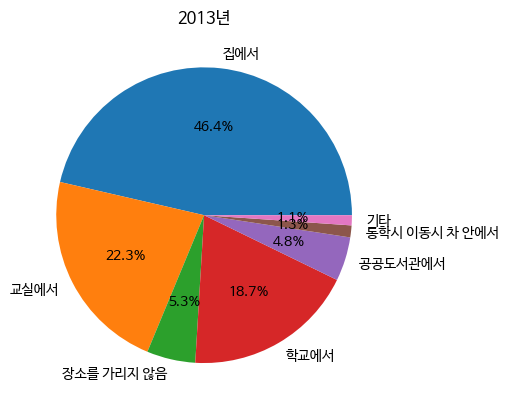

In [28]:
독서장소_데이터2013 = 독서를하는곳[['2013.1','2013.2','2013.3','2013.4','2013.5','2013.6','2013.7']].iloc[1]
독서장소_요인2013 = 독서를하는곳[['2013.1','2013.2','2013.3','2013.4','2013.5','2013.6','2013.7']].iloc[0]
plt.title("2013년")
plt.pie(독서장소_데이터2013, labels=독서장소_요인2013,autopct='%.1f%%')
plt.show()

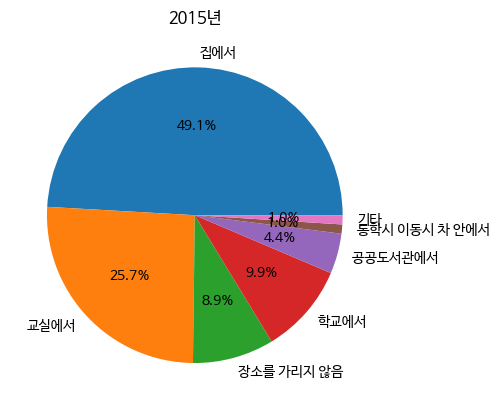

In [29]:
독서장소_데이터2015 = 독서를하는곳[['2015.1','2015.2','2015.3','2015.4','2015.5','2015.6','2015.7']].iloc[1]
독서장소_요인2015 = 독서를하는곳[['2015.1','2015.2','2015.3','2015.4','2015.5','2015.6','2015.7']].iloc[0]
plt.title("2015년")
plt.pie(독서장소_데이터2015, labels=독서장소_요인2015,autopct='%.1f%%')
plt.show()

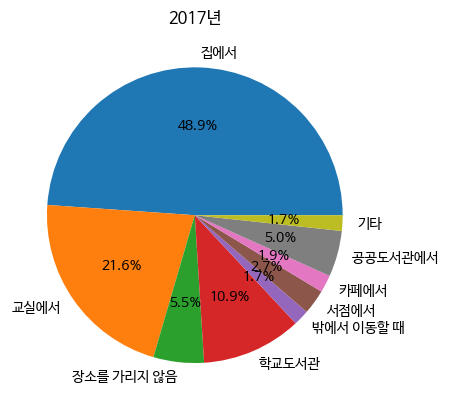

In [30]:
독서장소_데이터2017 = 독서를하는곳[['2017.1','2017.2','2017.3','2017.4','2017.5','2017.6','2017.7','2017.8','2017.9']].iloc[1]
독서장소_요인2017 = 독서를하는곳[['2017.1','2017.2','2017.3','2017.4','2017.5','2017.6','2017.7','2017.8','2017.9']].iloc[0]
plt.title("2017년")
plt.pie(독서장소_데이터2017, labels=독서장소_요인2017,autopct='%.1f%%')
plt.show()

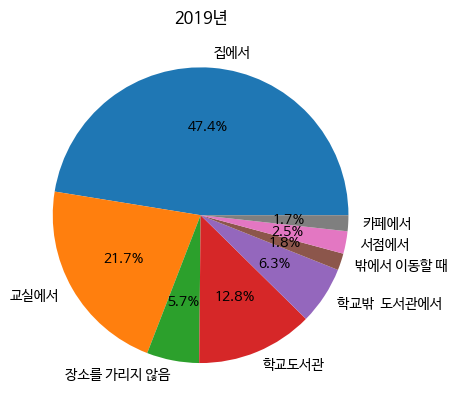

In [31]:
독서장소_데이터2019 = 독서를하는곳[['2019.1','2019.2','2019.3','2019.4','2019.5','2019.6','2019.7','2019.8']].iloc[1]
독서장소_요인2019 = 독서를하는곳[['2019.1','2019.2','2019.3','2019.4','2019.5','2019.6','2019.7','2019.8']].iloc[0]
plt.title("2019년")
plt.pie(독서장소_데이터2019, labels=독서장소_요인2019,autopct='%.1f%%')
plt.show()

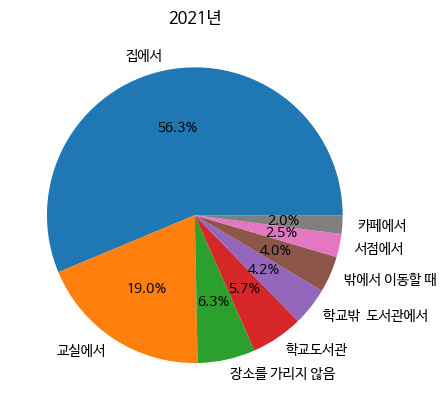

In [32]:
독서장소_데이터2021 = 독서를하는곳[['2021.1','2021.2','2021.3','2021.4','2021.5','2021.6','2021.7','2021.8']].iloc[1]
독서장소_요인2021 = 독서를하는곳[['2021.1','2021.2','2021.3','2021.4','2021.5','2021.6','2021.7','2021.8']].iloc[0]

plt.title("2021년")
plt.pie(독서장소_데이터2021, labels=독서장소_요인2021,autopct='%.1f%%')
plt.show()

# 학교밖 도서관을 이용하지 않는 이유

In [33]:
학교밖도서관 = pd.read_csv('',encoding='EUC-KR')
학교밖도서관

,통계분류(1),통계분류(2),통계분류(3),2011,2011.1,2011.2,2011.3,2011.4,2011.5,2011.6,...,2019.8,2019.9,2019.10,2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6
0,통계분류(1),통계분류(2),통계분류(3),계,집에서 멀다,읽을 만한 책이 없다,이용할 필요성을 느끼지 못한다,이용할 시간이 없어서,다른곳 이용이 더 편리해서,원하는 책을 찾기 어려워서,...,독서상담 안내없음,시설이 낡아서 쾌적하지 않다,귀찮다,사례수,책을읽지않는다,집에서 멀다,학원 과외 등으로 바빠서 이용할 시간이 없다,읽고 싶은 책은 사서 읽는다,주로 학교 도서관을 이용한다,읽을 만한 책이 없다
1,전체,소계,소계,100,48.2,4.2,13.7,12.8,6.3,2.7,...,0.1,0.4,3.2,1791,27.5,21.8,19.9,10.1,7,2.4
2,학교급,초등학교,소계,100,41.2,2.9,8.8,18.7,8.6,2.3,...,0,0,2.7,504,22.4,20.8,17.9,9.2,10.7,3.5
3,학교급,중학교,소계,100,50.2,5.8,17.1,11.3,3.2,3.8,...,0.5,0.7,3.6,637,29.3,22.1,21.2,10.2,5.3,1.8
4,학교급,고등학교,소계,100,51.8,3.6,14.2,9.6,7.6,2,...,0,0.4,3.1,650,29.6,22.2,20.3,10.6,5.8,2.1
5,연간독서량(종이책기준),없음,소계,-,-,-,-,-,-,-,...,0,0.5,4.8,328,48,15.3,14.4,5,2.1,3.1
6,연간독서량(종이책기준),1~5권,소계,-,-,-,-,-,-,-,...,0.3,0.6,3.8,707,32.2,21.4,19.8,9.4,6,2.7
7,연간독서량(종이책기준),6~10권,소계,-,-,-,-,-,-,-,...,0,0,3.2,265,17.8,29.8,22.4,13.6,7.1,0.7
8,연간독서량(종이책기준),11~15권,소계,-,-,-,-,-,-,-,...,1.1,0,2.2,99,17.4,20.4,25.5,14.8,10,0
9,연간독서량(종이책기준),16~20권,소계,-,-,-,-,-,-,-,...,0,0,0,79,17.8,22,25.2,7.6,7.1,1.9


In [34]:
ㅇㅇ = 학교밖도서관.iloc[0].reset_index()

len(list(ㅇㅇ[0]))

75

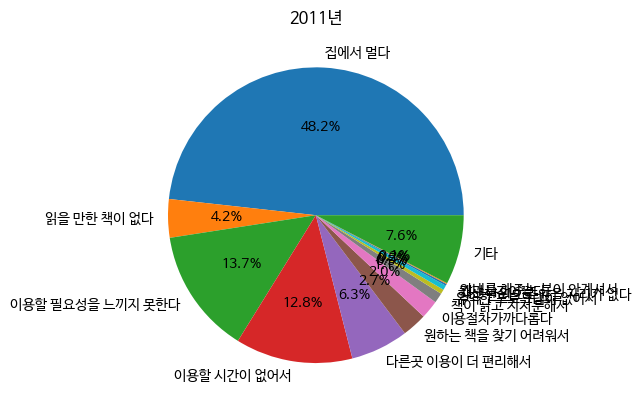

2011.1     48.2
2011.2      4.2
2011.3     13.7
2011.4     12.8
2011.5      6.3
2011.6      2.7
2011.7        2
2011.8      1.1
2011.9      0.5
2011.10     0.5
2011.11     0.2
2011.12     0.1
2011.13     7.6
Name: 1, dtype: object


In [46]:
학교밖도서관_데이터2011 = 학교밖도서관[['2011.1','2011.2','2011.3','2011.4','2011.5','2011.6','2011.7','2011.8','2011.9','2011.10','2011.11','2011.12','2011.13']].iloc[1]
학교밖도서관_요인2011 = 학교밖도서관[['2011.1','2011.2','2011.3','2011.4','2011.5','2011.6','2011.7','2011.8','2011.9','2011.10','2011.11','2011.12','2011.13']].iloc[0]
plt.pie(학교밖도서관_데이터2011, labels=학교밖도서관_요인2011,autopct='%.1f%%')
plt.title("2011년")
plt.show()


In [81]:

학교밖도서관_데이터2011 = 학교밖도서관_데이터2011.astype(dtype='float')
학교밖도서관_데이터2011 = 학교밖도서관_데이터2011.sort_values(ascending=False)

학교밖도서관_데이터2011

,1
2011.1,48.2
2011.3,13.7
2011.4,12.8
2011.13,7.6
2011.5,6.3
2011.2,4.2
2011.6,2.7
2011.7,2.0
2011.8,1.1
2011.9,0.5


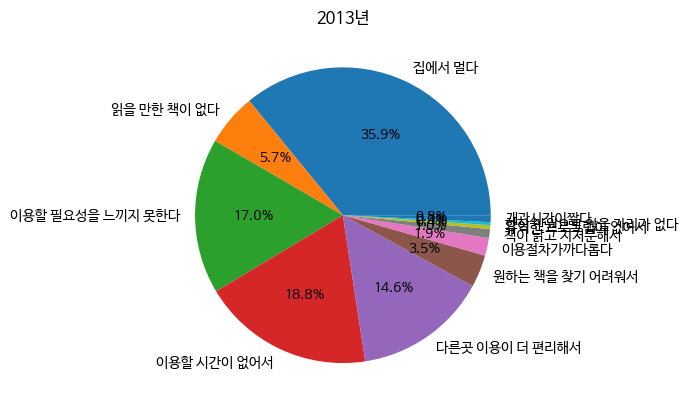

In [36]:
df1학교밖도서관_데이터2013 = 학교밖도서관[['2013.1','2013.2','2013.3','2013.4','2013.5','2013.6','2013.7','2013.8','2013.9','2013.10','2013.11']].iloc[1]
학교밖도서관_요인2013 = 학교밖도서관[['2013.1','2013.2','2013.3','2013.4','2013.5','2013.6','2013.7','2013.8','2013.9','2013.10','2013.11']].iloc[0]
plt.pie(학교밖도서관_데이터2013, labels=학교밖도서관_요인2013,autopct='%.1f%%')
plt.title("2013년")
plt.show()

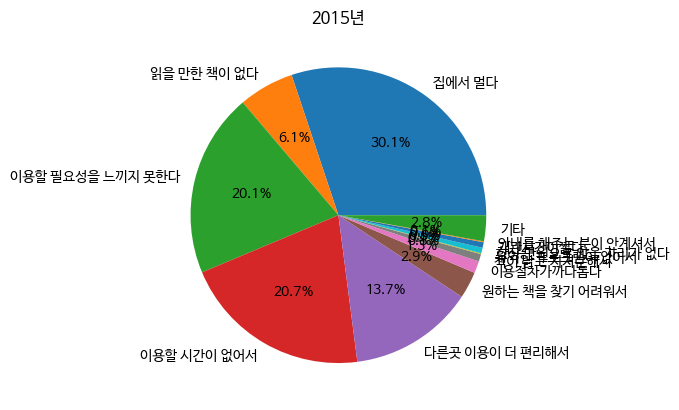

In [37]:
학교밖도서관_데이터2015 = 학교밖도서관[['2015.1','2015.2','2015.3','2015.4','2015.5','2015.6','2015.7','2015.8','2015.9','2015.10','2015.11','2015.12','2015.13']].iloc[1]
학교밖도서관_요인2015 = 학교밖도서관[['2015.1','2015.2','2015.3','2015.4','2015.5','2015.6','2015.7','2015.8','2015.9','2015.10','2015.11','2015.12','2015.13']].iloc[0]
plt.pie(학교밖도서관_데이터2015, labels=학교밖도서관_요인2015,autopct='%.1f%%')
plt.title("2015년")
plt.show()


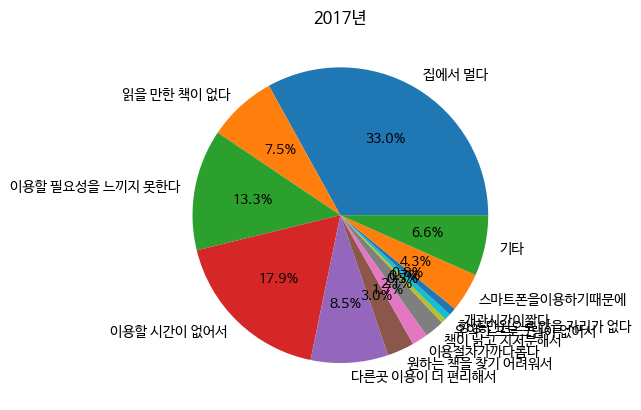

In [38]:
학교밖도서관_데이터2017 = 학교밖도서관[['2017.1','2017.2','2017.3','2017.4','2017.5','2017.6','2017.7','2017.8','2017.9','2017.10','2017.11','2017.12','2017.13']].iloc[1]
학교밖도서관_요인2017 = 학교밖도서관[['2017.1','2017.2','2017.3','2017.4','2017.5','2017.6','2017.7','2017.8','2017.9','2017.10','2017.11','2017.12','2017.13']].iloc[0]
plt.pie(학교밖도서관_데이터2017, labels=학교밖도서관_요인2017,autopct='%.1f%%')
plt.title("2017년")
plt.show()

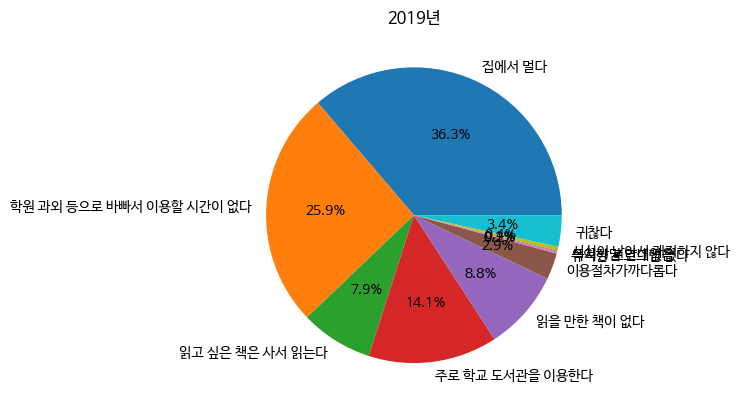

In [39]:
학교밖도서관_데이터2019 = 학교밖도서관[['2019.1','2019.2','2019.3','2019.4','2019.5','2019.6','2019.7','2019.8','2019.9','2019.10']].iloc[1]
학교밖도서관_요인2019 = 학교밖도서관[['2019.1','2019.2','2019.3','2019.4','2019.5','2019.6','2019.7','2019.8','2019.9','2019.10']].iloc[0]
plt.pie(학교밖도서관_데이터2019, labels=학교밖도서관_요인2019,autopct='%.1f%%')
plt.title("2019년")
plt.show()

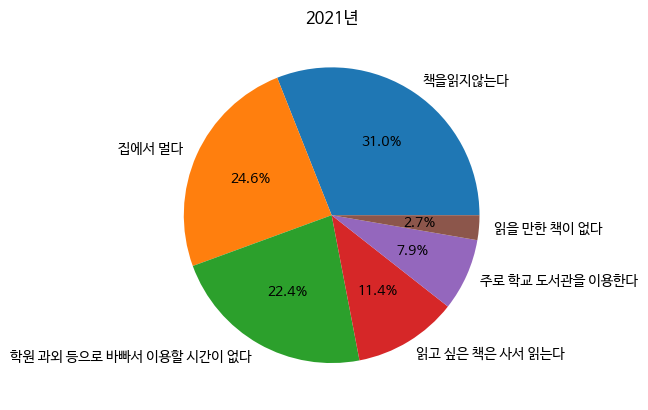

In [40]:
학교밖도서관_데이터2021 = 학교밖도서관[['2021.1','2021.2','2021.3','2021.4','2021.5','2021.6']].iloc[1]
학교밖도서관_요인2021 = 학교밖도서관[['2021.1','2021.2','2021.3','2021.4','2021.5','2021.6']].iloc[0]
plt.pie(학교밖도서관_데이터2021, labels=학교밖도서관_요인2021,autopct='%.1f%%')
plt.title("2021년")
plt.show()


# 독서계기

In [41]:
독서계기 = pd.read_csv('',encoding='EUC-KR')
독서계기

,통계분류(1),통계분류(2),통계분류(3),2021,2021.1,2021.2,2021.3,2021.4,2021.5,2021.6,2021.7,2021.8,2021.9,2021.10
0,통계분류(1),통계분류(2),통계분류(3),사례수,스스로 읽고 싶어서,교과 공부에 필요 해서,부모님이 권해서,주변에 책이 있어서,유튜브 SNS(페 이스북 트위터 등)를 보고,학교선생님이 권해서,드라마/영화 원작을 읽고 싶어서,신문 방송 인터넷 에서 책 소개를 보고,친구가 권해서,도서관 행사에 참여하려고
1,전체,소계,소계,3036,25.3,15.6,15,9.3,8.4,8.1,6.3,4.4,2.1,1.4
2,학교급별,초등학교,소계,1070,21.5,13.1,26,12.3,4.5,8.4,4.9,2.2,0.9,1.2
3,학교급별,중학교,소계,1006,25.6,14.2,13.1,8.3,10.5,8.2,7.6,4.4,2.1,1.3
4,학교급별,고등학교,소계,960,29.1,19.7,4.8,7.1,10.6,7.5,6.4,6.9,3.6,1.8
5,연간독서량(종이책기준),없음,소계,133,19.7,8.9,10.3,6.1,17.8,7.5,16.8,3.4,4.2,1.9
6,연간독서량(종이책기준),1~5권,소계,1148,20.8,18.5,12.2,7.3,10.9,10.3,7,6,2.6,1.7
7,연간독서량(종이책기준),6~10권,소계,528,26.5,15.4,14.4,8,8.5,8.9,6,4.9,2.3,1.2
8,연간독서량(종이책기준),11~15권,소계,205,29.5,14.7,12.6,7.8,9.5,6.2,6.8,5.1,1.8,2
9,연간독서량(종이책기준),16~20권,소계,180,22.4,19,17,11.8,5.5,8.1,5.2,4.7,2.1,1
